In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
import joblib
import os
warnings.filterwarnings('ignore')

1) here i imported libraries that will be used in this assignment.

In [100]:
data = pd.read_csv("Iris.csv")
data.shape
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

2) loading the dataset and checked it's rows and columns.

In [101]:
X , y = data.iloc[:,1:5], data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 28)

3) here i seprated the dataset into it's features and labels into X and y respectively. then just performing the train_test_split on X and y.

In [102]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

4) here just encoding the orignal labels that were ['B','M'] into [0,1]

In [103]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

y_train_encoded
y_train

82     Iris-versicolor
18         Iris-setosa
79     Iris-versicolor
37         Iris-setosa
125     Iris-virginica
            ...       
3          Iris-setosa
32         Iris-setosa
22         Iris-setosa
5          Iris-setosa
1          Iris-setosa
Name: Species, Length: 90, dtype: object

5) using standardization on X_train and X_test.

In [104]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_encoded)
y_pred = lr.predict(X_test_scaled)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

7) appling that logistic regression on scaled data and checking the accuracy.

In [105]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      0.91      0.91        23
           2       0.89      0.89      0.89        19

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.93      0.93      0.93        60



8) here is the classification report of scaled data.

<Axes: >

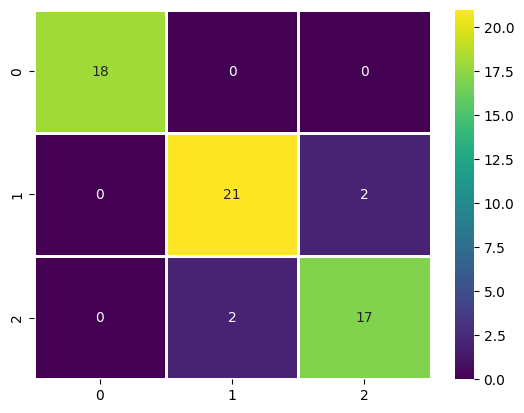

In [106]:
preprocessed_data = confusion_matrix (y_test_encoded, y_pred)
sns.heatmap(preprocessed_data,annot=True, cmap='viridis', linewidths=.9)

9) simply using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on scaled data.

In [107]:
lr2 = LogisticRegression()
lr2.fit(X_train,y_train_encoded)
y_pred2= lr2.predict(X_test)
acc2= np.sum(y_pred2==y_test_encoded)/len(y_test_encoded)
print(acc2*100,"%")

95.0 %


10) now applying the logistic regression on orignal unscaled data and seeing it's accuracy.

In [108]:
print(classification_report(y_test_encoded,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      0.91      0.93        23
           2       0.90      0.95      0.92        19

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



11) getting the classfication report on unscaled data.

<Axes: >

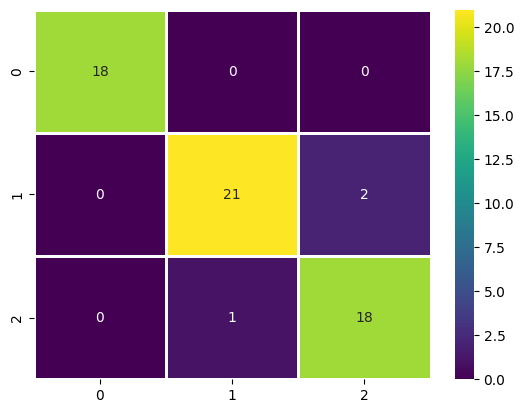

In [109]:
normal_data = confusion_matrix (y_test_encoded, y_pred2)
sns.heatmap(normal_data,annot=True, cmap='viridis', linewidths=.9)

12) using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on unscaled data.

In [110]:
print("accuracy on scaled data = ",acc*100,"%")

accuracy on scaled data =  93.33333333333333 %


In [111]:

if not os.path.exists('Models'):
    os.mkdir('Models')
if not os.path.exists('Scalers'):
    os.mkdir('Scalers')
joblib.dump(lr, r'Models/model.pickle')
joblib.dump(scaler, r'Scalers/scaler.pickle')

['Scalers/scaler.pickle']

14. saving the model so we can load it again or on an other device after deploying it on the machine.